# CS579: Lecture 11  

**Seniment Analysis II (Machine Learning)**

*[Dr. Aron Culotta](http://cs.iit.edu/~culotta)*  
*[Illinois Institute of Technology](http://iit.edu)*

## What is machine learning?
<br><br><br><br><br><br><br><br><br><br>

## What is machine learning?

- [Dietterich: "Machine Learning"](http://web.engr.oregonstate.edu/~tgd/publications/nature-ecs-machine-learning.pdf)
- [Domingos: "A few useful things to know about machine learning"](http://homes.cs.washington.edu/~pedrod/papers/cacm12.pdf)
<br><br><br><br><br>


## What is machine learning?

"Study of methods for programming computers to learn." 

-- Dietterich

<br><br><br><br><br>


## What is machine learning?

Study of systems that "automatically learn programs from data" 

-- Domingos

<br><br><br><br><br>


## What is machine learning?

A problem-solving technique that solves future problem instances based on
patterns found in past problem instances

<br><br><br><br><br>

![spam](images/spam.png)

<img src='images/search.png' width='50%'/>

<img src='images/netflix.png', width='70%'/>

<img src='images/bw.png' width='50%'/>

<img src='images/chopper.png' width='70%'>

<img src='images/car.jpg' width='70%'/>

![money](images/money.png)

<img src='images/doc.png' width='40%'/>

<img src='images/siri.png' width='40%'/>

<img src='images/watson.png' width='70%'/>

## Notation

- $\vec{x} \in \mathcal{X}$ &nbsp;&nbsp;&nbsp;&nbsp; *instance*, *example*, *input*
  - e.g., an email
- $y \in \mathcal{Y}$ &nbsp;&nbsp;&nbsp;&nbsp; *target*, *class*, *label*, *output*
  - e.g., $y=1$: spam ; $y=0$: not spam
- $f: \mathcal{X} \mapsto \mathcal{Y}$ &nbsp;&nbsp;&nbsp;&nbsp; *hypothesis*, *learner*, *model*, *classifier*
  - e.g., if $x$ contain the word *free*, $y$ is $1$.
  
  <br><br><br><br><br>

## Problem types

- **Classification**
  - $\vec{x}$: image of a person ;  $y$: gender
- **Regression**
  - $\vec{x}$: image of a person ; $y$: age
- **Clustering**
  - $\vec{x}$: images of people ; $y$: cluster id of people that look similar
- **Structured classification**
  - $\vec{x}$: image of a person ; $\vec{y}$: location of their eyes and ears
  - $X$: sequence of images of people ; $Y$: subsequences containing people running
  
  <br><br><br><br><br>

## Workflow

1. **Collect** raw data: emails
2. Manually **categorize** them:  spam or not
3. **Vectorize**: email -> word counts [**features**]
4. **Train** / **Fit**: create $f(x)$
5. **Collect** new raw data
6. **Predict**: compute $f(x)$ for new $x$

<br><br><br><br><br>

## Example: Spam Classification

**Steps 1 & 2: Collect and categorize**

**Spam:**

> Free credit report!


> Free money!


**Not spam:**

> Are you free tonight?

> How are you?


**Step 3: Vectorize**

> 'Free money!'

becomes

```
free: 1
money: 1
!: 1
?: 0
credit: 0
...
```

**Representation**: "Feature engineering is the key" -- Domingos


**Step 4: Train/Fit**

Which model to use?

- Naive Bayes
- Logistic Regression
- Decision Tree
- K-Nearest Neighbors
- Support Vector Machines
- ... many many more

**Steps 5-6: Predict on new data**

> Free vacation!

**Spam**

How do you know if it works?

In [25]:
# X: each row is a feature vector for one document.
X = [(0, 0),
     (1, 0),
     (0,3),
     (1,3)]
# y: element i is a label for ith document
y = [0, 0, 1, 1]

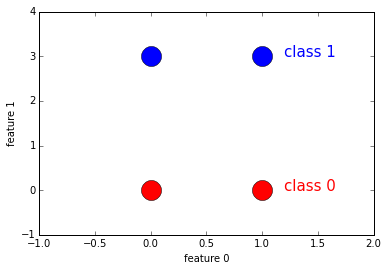

In [26]:
# Plot the data. 
# Red means class 0, blue means class 1.
import matplotlib.pyplot as plt
%matplotlib inline

def plot_data(X, y):
    """ Assumes 2-d data. """
    plt.figure()
    for xi, yi in zip(X, y):
        color = 'r' if yi == 0 else 'b'
        plt.plot(xi[0], xi[1], color + 'o', ms=20)
    plt.xlabel('feature 0')
    plt.ylabel('feature 1')
    plt.xlim((-1,2))
    plt.ylim((-1, 4))
    plt.annotate('class 0', xy=(1.2, 0), color='r', size=15)
    plt.annotate('class 1', xy=(1.2, 3), color='b', size=15)
    plt.show()
    
plot_data(X, y)

In [29]:
# Simplest machine learning algorithm:

class SimplestMachine:
    
    def __init__(self):
        self.f = dict()

    def train(self, X, y):
        for xi, yi in zip(X, y):
          self.f[xi] = yi

    def predict(self, x):
        return self.f[x]

# What does this do?









In [49]:
# What does zip do?
zip([1, 2, 3], ['a', 'b', 'c', 'd'])

[(1, 'a'), (2, 'b'), (3, 'c')]

In [31]:
simplest_machine = SimplestMachine()
simplest_machine.train(X, y)
predictions = [simplest_machine.predict(xi) for xi in X]
print 'pred\ttruth\n', '\n'.join('%d\t%d' % (p, yi) for p, yi in zip(predictions, y))







pred	truth
0	0
0	0
1	1
1	1


In [32]:
# What does it do for unseen example?
simplest_machine.predict((0, 4))






KeyError: (0, 4)

In [33]:
# Second simplest machine learning algorithm:
import numpy as np

class SimpleMachine:

    def __init__(self):
        self.f = dict()

    def train(self, X, y):
        for xi, yi in zip(X, y):
          self.f[xi] = yi

    def predict(self, x):
        x_closest = self.find_most_similar(x)
        return self.f[x_closest]
    
    def find_most_similar(self, x):
        best_idx = np.argmin([self.distance(x, xi)
                              for xi in self.f.keys()])
        return self.f.keys()[best_idx]

    def distance(self, x, xi):
        return np.sqrt(np.sum((np.array(x)-np.array(xi))**2))
        
# What does this do?

In [34]:
simple_machine = SimpleMachine()
simple_machine.train(X, y)
predictions = [simple_machine.predict(xi) for xi in X]
print 'pred\ttruth\n', '\n'.join('%d\t%d' % (p, yi) for p, yi in zip(predictions, y))




pred	truth
0	0
0	0
1	1
1	1


In [35]:
# What does it do for unseen example?
simple_machine.predict((0, 4))






1

<img src='images/knn.png' width='80%'/>

<http://www.scholarpedia.org/article/K-nearest_neighbor>


## Generalization

How accurate will I be on a new, unobserved example?

How do you know if it works?

1. Train on data ${\mathcal D_1}$
2. Predict on data ${\mathcal D_2}$
3. Compute accuracy on ${\mathcal D_2}$.
   - Why not ${\mathcal D_1}$?

How do you know if it works?

1. Train on data ${\mathcal D_1}$
2. Predict on data ${\mathcal D_2}$
3. Compute accuracy on ${\mathcal D_2}$.
4. Tweak algorithm / representation
5. Repeat

How do you know if it works?

1. Train on data ${\mathcal D_1}$
2. Predict on data ${\mathcal D_2}$
3. Compute accuracy on ${\mathcal D_2}$.
4. Tweak algorithm / representation
5. Repeat

How many times can I do this?


## Measuring Generalization

- Cross-validation
  - train on 90%, test on 10%, repeat 10 x's
       - each example appears only once in test set


## Experimental Design

1. Collect data
2. Build model
3. Compute cross-validation accuracy
4. Tune model
5. Repeat


## Experimental Design

1. Collect data
2. Build model
3. Compute cross-validation accuracy
4. Tune model
5. Repeat
6. **Report accuracy on new data**


- What is overfitting? How do you know it is happening? How do you fix?

<img src='images/biasvariance.png' width='70%'/>

<http://scott.fortmann-roe.com/docs/BiasVariance.html>

## Machine Learning for Sentiment Analysis

1. Collect data: E.g., <http://help.sentiment140.com/for-students>

In [37]:
# Download Twitter data labeled by sentiment.

from StringIO import StringIO
from zipfile import ZipFile
from urllib import urlopen

# The file is 78M, so this will take a while.
#url = urlopen('http://cs.stanford.edu/people/alecmgo/trainingandtestdata.zip')
#zipfile = ZipFile(StringIO(url.read()))
# We'll focus on the smaller file that was manually labeled.
# The larger file has 1.6M tweets "pseudo-labeled" using emoticons
tweet_file = zipfile.open('testdata.manual.2009.06.14.csv')

In [38]:
import csv
file_reader = csv.reader(tweet_file, delimiter=',', quotechar='"')
tweets = []
for row in file_reader:
    tweets.append({'label': int(row[0]),
                   'text': row[5]})
print 'read %d tweets' % len(tweets)

read 498 tweets


In [39]:
tweets[0]

{'label': 4,
 'text': '@stellargirl I loooooooovvvvvveee my Kindle2. Not that the DX is cool, but the 2 is fantastic in its own right.'}

In [40]:
# Create label vector (y) and print its stats.
from collections import Counter
y = np.array([t['label'] for t in tweets])
print 'label counts=', Counter(y)

label counts= Counter({4: 182, 0: 177, 2: 139})


In [41]:
# Create feature vectors (X)
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(t['text'] for t in tweets)
print 'vectorized %d tweets. found %d terms.' % (X.shape[0], X.shape[1])

vectorized 498 tweets. found 2264 terms.


In [42]:
# Print part of the vocabulary.
vectorizer.vocabulary_.items()[:10]

[(u'msgs', 1325),
 (u'whoopi', 2176),
 (u'sleep', 1804),
 (u'6pm', 67),
 (u'hate', 920),
 (u'whose', 2177),
 (u'boortz', 317),
 (u'davehitt', 557),
 (u'bike', 276),
 (u'under', 2072)]

In [43]:
# What are the most frequent terms?
# Sum columns:
col_sums = X.sum(axis=0).tolist()[0]
# Sort sums in descending order, and return the indices.
top_indices = np.argsort(col_sums)[::-1]
print 'top_indices=', top_indices
vocab = np.array(vectorizer.get_feature_names())
top_terms = vocab[top_indices]
print 'top_terms:\n', '\n'.join('%s %d' % (term, count) for term, count in zip(top_terms, top_indices)[:10])

top_indices= [1961 1998  988 ..., 1363 1364    0]
top_terms:
the 1961
to 1998
http 988
is 1060
and 152
at 209
it 1062
for 790
my 1337
of 1416


2.) Build model

In [44]:
# Fit a LogisticRegression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)

In [45]:
# Compute accuracy
def accuracy(truth, predicted):
    return (1. * len([1 for tr, pr in zip(truth, predicted) if tr == pr]) / len(truth))

predicted = model.predict(X)
print 'accuracy on training data=%.3f' % accuracy(y, predicted)

accuracy on training data=0.996


In [46]:
# What are the top weighted features?

# Get the learned coefficients for the Positive class.
coef = model.coef_[2]
# Sort them in descending order.
top_coef_ind = np.argsort(coef)[::-1]
# Get the names of those features.
top_coef_terms = vocab[top_coef_ind]
# Get the weights of those features
top_coef = coef[top_coef_ind]
# Print the top 10.
print 'top weighted terms for positive class:\n', \
    '\n'.join('%s %.2f' % (term, weight) for term, weight in zip(top_coef_terms, top_coef)[:10])

top weighted terms for positive class:
awesome 1.52
love 1.51
g2 1.23
good 1.17
kindle2 1.03
lebron 0.95
great 0.89
mcdonalds 0.81
tonight 0.80
mashable 0.80


In [47]:
# Get the learned coefficients for the Negative class.
coef = model.coef_[0]
# Sort them in descending order.
top_coef_ind = np.argsort(coef)[::-1]
# Get the names of those features.
top_coef_terms = vocab[top_coef_ind]
# Get the weights of those features
top_coef = coef[top_coef_ind]
# Print the top 10.
print 'top weighted terms for negative class:\n', \
    '\n'.join('%s %.2f' % (term, weight) for term, weight in zip(top_coef_terms, top_coef)[:10])

top weighted terms for negative class:
warner 1.56
hate 1.29
aig 1.28
gm 1.08
korea 1.06
north 1.06
not 1.05
cheney 0.94
that 0.89
fail 0.89


In [48]:
# 5 Cross-validation accuracy
from sklearn.cross_validation import KFold

cv = KFold(len(y), 5)
accuracies = []
for train_ind, test_ind in cv:
    model.fit(X[train_ind], y[train_ind])
    predictions = model.predict(X[test_ind])
    accuracies.append(accuracy(y[test_ind], predictions))
    
print 'Average 5-fold cross validation accuracy=%.2f (std=%.2f)' % (np.mean(accuracies), np.std(accuracies))

Average 5-fold cross validation accuracy=0.67 (std=0.04)
